<a href="https://colab.research.google.com/github/avk29/BreastCancerDetection_DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)


In [2]:
# Importing requried libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image
from scipy import misc
import random as python_random
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
np.random.seed(23)
python_random.seed(23)
tf.random.set_seed(34)
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
normal = os.listdir("/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Normal_30")
benign = os.listdir("/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Benign_30")
cancer = os.listdir("/content/drive/MyDrive/Capstone/Data//Mini_DDSM_Upload/Data_latest copy/Cancer_30")

# Storing the first 30 images of each class
normal = normal[0:30]
benign = benign[:30]
cancer = cancer[:30]

In [5]:
img= Image.open("/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Benign_30/10_C_0217_1.LEFT_MLO.LJPEG.1_highpass.png").resize((128,128))
img.getbands() #shows the channels in the images

('R', 'G', 'B', 'A')

In [6]:
dataset = np.concatenate([normal, benign, cancer])
len(dataset) == len(normal)+len(benign)+len(cancer)

True

In [7]:
tar_x = np.full(len(normal),0)
tar_y = np.full(len(benign),1)
tar_z = np.full(len(cancer),2)

data_target = np.concatenate([tar_x, tar_y, tar_z])
len(data_target) == len(tar_x) + len(tar_y) + len(tar_z)
data_target = tf.keras.utils.to_categorical(data_target,num_classes=3)

In [8]:
# Resizing images of each class and adding all of them to a list

X_data = []

for i in normal:
  img = cv2.imread('/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Normal_30/'+i)
  face = cv2.resize(img, (250, 250))
  (b, g, r) = cv2.split(face)
  img = cv2.merge([r,g,b])
  X_data.append(img)


for i in benign:
  img = cv2.imread('/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Benign_30/'+i)
  face = cv2.resize(img, (250, 250))
  (b, g, r) = cv2.split(face) 
  img = cv2.merge([r,g,b])
  X_data.append(img)


for i in cancer:
  img = cv2.imread('/content/drive/MyDrive/Capstone/Data/Mini_DDSM_Upload/Data_latest copy/Cancer_30/'+i)
  face = cv2.resize(img, (250,250))
  (b, g, r) = cv2.split(face) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

In [9]:
img[249].shape

(250, 3)

Images Explanation:

As shown by the output of the cell below, each image is a 3D matrix with 250 x 250 pixels. Each pixel has three values (r,g,b) which are same for all the pixels. hence the image looks like a grayscale image

In [10]:
img.shape

(250, 250, 3)

In [11]:
X = np.squeeze(X_data)
X = X.astype('float32')
X /= 255

In [12]:
# Splitting the data into an 80:20 training and testing split.
# Further, 10% of testing data is used as validation data.


tf.random.set_seed(3)
x_train, x_test, y_train, y_test = train_test_split(X, data_target, 
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify=data_target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                    test_size = 0.10,
                                                    random_state = 43,stratify=y_train)

In [13]:
# Early stopping

callback= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=True
)

## CNN Model

In [14]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3, padding='valid', activation='relu', input_shape=(250,250,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=(2,2)))
# model.add(tf.keras.layers.Dropout(0.45))#regularization
#For example, if the first layer has 256 units, after dropout=0.45 is applied, 
#only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=(2,2)))
# model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=(2,2)))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(4000, activation='relu'))
# model.add(tf.keras.layers.Dense(3000, activation='relu'))
# model.add(tf.keras.layers.Dense(2000, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))
# model.add(tf.keras.layers.Dense(1000, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(516, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(3, activation='softmax'))

# Take a look at the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(), #change the parameters- Adam (beta1, beta2)
             metrics=['acc'])

Epoch 1/60
7/7 [==============================] - 13s 131ms/step - loss: 8.4531 - acc: 0.3281 - val_loss: 7.6426 - val_acc: 0.3750
Epoch 2/60
7/7 [==============================] - 0s 34ms/step - loss: 7.2706 - acc: 0.3281 - val_loss: 6.5780 - val_acc: 0.3750
Epoch 3/60
7/7 [==============================] - 0s 35ms/step - loss: 6.2521 - acc: 0.4219 - val_loss: 5.6402 - val_acc: 0.5000
Epoch 4/60
7/7 [==============================] - 0s 35ms/step - loss: 5.3506 - acc: 0.4688 - val_loss: 4.7407 - val_acc: 0.6250
Epoch 5/60
7/7 [==============================] - 0s 35ms/step - loss: 4.4951 - acc: 0.4219 - val_loss: 3.9363 - val_acc: 0.7500
Epoch 6/60
7/7 [==============================] - 0s 34ms/step - loss: 3.7539 - acc: 0.5781 - val_loss: 3.2382 - val_acc: 0.7500
Epoch 7/60
7/7 [==============================] - 0s 38ms/step - loss: 3.0714 - acc: 0.6094 - val_loss: 2.4650 - val_acc: 0.7500
Epoch 8/60
7/7 [==============================] - 0s 37ms/step - loss: 2.5911 - acc: 0.5469 - v

Text(0.5, 1.0, 'Adam')

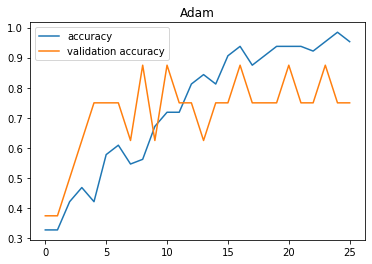

In [16]:
hist= model.fit(x_train,
         y_train,
         batch_size=10,
         callbacks=[callback],
         epochs=60, validation_data= (x_valid, y_valid))

score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['accuracy','validation accuracy'])
plt.title("Adam")

In [17]:
score = model.evaluate(x_train, y_train, verbose=0)
score[1]

0.953125